# 4.1 선형회귀

## 4.1.1 정규방정식

In [8]:
import numpy as np

# 선형 데이터 생성

X= 2*np.random.rand(100,1)
y= 4+3*X+np.random.randn(100,1)


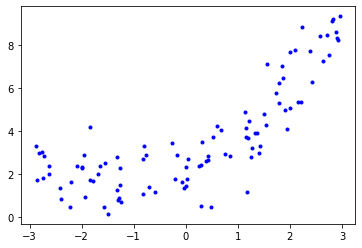

In [53]:
import matplotlib.pyplot as plt 
plt.plot(X,y,"b.")

In [12]:

X_b =np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# -> 정규방정식 사용  
# np.linalg.inv(x) -> 역행렬

In [13]:
theta_best

# 4, 3 이 츨력되기를 기대했지만 노이즈 때문에 장확히 재현하지는 못함

array([[3.9867794 ],
       [3.10741283]])

In [19]:
X_new =np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] # 
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 3.9867794 ],
       [10.20160505]])

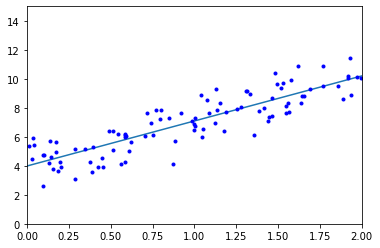

In [20]:
plt.plot(X_new,y_predict)
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lin_reg.intercept_, lin_reg.coef_


(array([3.9867794]), array([[3.10741283]]))

In [24]:
lin_reg.predict(X_new)

array([[ 3.9867794 ],
       [10.20160505]])

In [26]:
theta_best_svd, residuals, rank, s =np.linalg.lstsq(X_b,y,rcond =1e-6)# 무어 펜로즈 행렬 계산
theta_best_svd

# 역행렬 연산이 아니라 유사역행렬(무어 펜로즈 역행렬) 사용 
# 역행렬 연산이 가능한 가역행렬-> 역행렬==무어 펜로즈 역행렬
# 역행렬 연산이 불가능한 행렬-> 무어 펜로즈 행렬로 대체해서 사용하는 것이 일반적인 방법 (행렬 shape과 관계없이 svd는 할 수 있기 때문)

array([[3.9867794 ],
       [3.10741283]])

# 4.1.2 계산복잡도

In [ ]:
정규방정식은 Xt * X 의 역행렬을 계산 해야하므로 O(n^(2.4)) ~O(n^3) 이다.
LinearRegression 에서 svd를 사용하는 방법은 약 O(n^2)이다 -> 특성개수가 늘어나면 계산시간 단축

caution!! 정규방정식, svd 모두 특성수가 많아지면(> 100,000) 매우 느려진다.
but 훈련세트의 샘플수에 대해서는 선형적으로 증가하므로 (O(m))메모리 공간만 괜찮다면 처리가능하다.

## 4.2 경사하강법

cost funstion가 convex 하므로(가정 or 이렇게 설정) 하이퍼 파라미터 벡터 e 에 관해서 cost function의 현재 gradient 를 계산하고

감소하는 방향으로 eta (lrearning rate, 하이퍼 파라미터) 만큼 진행-> gradient가 0 -> global minimum 판단 -> 최솟값!

caution!!  경사하강법을 사용할때는 반드시 모든 특성이 같은 스케일을 갖도록 해야합니다. 그렇지 않으면 수렴하는데 훨씬 오래 걸립니다.

-> loss function의 면이 불균형해지므로! (batch nomalization과도 일맥상통)

## 4.2.1 배치 경사하강법

매 경사하강법 스텝에서 전체 훈련 세트에 대해서 계산하므로 배치 경사하강법 (batch gradient descent)라고 합니다 

이런 이유로 데이터 크기가 크면 속도가 느려지지만 특성 수에 민감하지 않습니다. 

In [27]:
eta=0.1
n_iterations =100
m=100

theta=np.random.randn(2,1)# 무작위 초기화

for iteration in range(n_iterations):
    gradients =2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta* gradients   

In [28]:
theta 

array([[4.0050863 ],
       [3.09130644]])

# 4.2.2 확률적 경사하강법

매 스텝에서 한개의 샘플을 무작위로 선택하고 그 샘플에 대한 그래디언트를 계산합니다

-> 한번에 하나의 샘플만 계산하므로 빠르다, 메모리에 한번에 하나의 샘플만 있으면 되므로 매우 큰 훈련세트도 훈련시킬 수 있다.

but 무작위성으로 학습시키므로 배치 경사에 비해 불안정하게 loss function이 감소한다. 

무작위성은 local minimum에서 탈출할 수 있게도 해주지만 global minimum에 도달하지 못할 수도 있기 때문에 학습률을 점진적으로 감소시켜 global minimum에 도달하게 한다.

In [30]:
n_epochs = 50
t0, t1 =5,50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)    # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(eta*m+i)
        theta=theta-eta*gradients

In [31]:
theta

array([[3.93263992],
       [2.96894394]])

샘플을 무작위로 선택하기 때문에 샘플마다 학습횟수가 다름-> 훈련세트를 섞은후 순차적으로 사용 (늦게 수렴되기는 함)

caution!! 확률적 경사 하강법을 사용할때 iid 를 만족해야 평균적으로 파리미터가 global minimum으로 간다고 보장할 수 있습니다

-> 훈련하는동안 샘플을 섞으면 해결 할 수 있습니다. (샘플을 랜덤하게 선택하거나 epoch 시작시 혼련세트를 섞습니다)

In [38]:
from sklearn.linear_model import SGDRegressor # sse를 최적화 시키는 클래스

sgd_reg =SGDRegressor(max_iter=1000, tol=1e-3, penalty =None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [39]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.98342074]), array([3.11770876]))

# 4.2.3 미니배치 경사 하강법

미니배치라 부르는 임의의 작은 sample set에 대해 gradient를 계산
-> GPU 사용시 성능향상이 좋음

미니배치를 어느정도 크게할 경우 sgd보다 덜 불규칙적으로 움직임 but local minimum에서 빠져나오기는 더 힘듬

# 4.3 다항 회귀

In [66]:
m=100
X=6*np.random.rand(m,1)-3
y= 0.5*X**2+X+2+np.random.randn(m,1)# 잡음 섞인 2차방정식 데이터

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)# 훈련set의 각 특성을 제곱하여 새로운 특성으로 추가
X_poly =poly_features.fit_transform(X)
X[0]



array([-0.75975282])

In [48]:
X_poly[0]

array([-0.75975282,  0.57722435])

In [59]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.14017831]), array([[1.03680422, 0.42733115]]))

PolynomialFeatures 가  주어진 차수까지 interaction term 까지 추가함

ex) a,b 있을경우 degree=3 으로 설정하면 ab,a^2*b,a*b^2도 추가

caution!! 특성이 n개인 배열 에 degree=d를 적용하면 (n+d)!/d!n! 개인 배열로 변환하기에 특성이 엄청 늘어날 수 있음

# 4.4 학습곡선

In [60]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

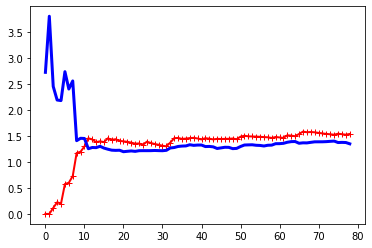

In [61]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

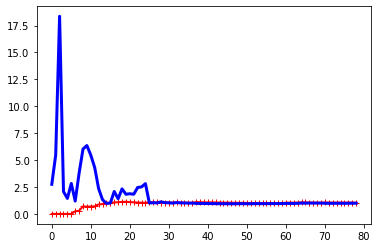

In [67]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)


# 4.5 규제가 있는 선형모델

## 4.5.1 릿지 회귀

In [69]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.81202535]])

In [70]:

ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.80910095]])

# 4.5.2 라쏘 회귀

In [72]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.76863027])

# 4.5.3 엘라스틱넷

In [73]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.76905352])

# 4.5.4 조기종료

In [77]:

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

# 4.6 로지스틱 회귀

In [80]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [81]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [82]:

X = iris["data"][:, 3:]  # 꽃잎의 너비
y = (iris["target"] == 2).astype(np.int) # 원핫 인코딩 

In [83]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

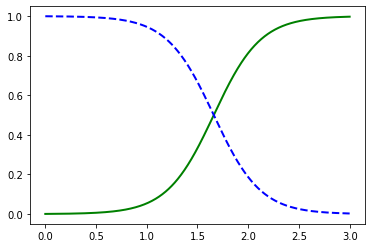

In [84]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

# 4.6.4 소프트맥스 회귀

In [85]:

X = iris["data"][:, (2, 3)]  # 꽃잎길이, 꽃잎너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
softmax_reg.predict([[5, 2]])

array([2])

In [87]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])